In [2]:
!uv pip install pandas

Resolved 6 packages in 538ms
Prepared 4 packages in 11.46s
Installed 4 packages in 10.74s
 + numpy==2.3.2
 + pandas==2.3.2
 + pytz==2025.2
 + tzdata==2025.2


In [6]:
!uv pip install lxml

Resolved 1 package in 375ms
Prepared 1 package in 1.38s
Installed 1 package in 233ms
 + lxml==6.0.1


In [45]:
import pandas as pd
import numpy as np

In [4]:
url = 'https://leagueoflegends.fandom.com/wiki/List_of_champions/Ratings'

In [8]:
page = pd.read_html(url)
len(page)

4

In [9]:
pd.read_html(url)[0]

,0,1,2
0,NaN,NaN,"""Time for a shakedown."" This article or sectio..."


In [10]:
pd.read_html(url)[1]

,Key,Definition
0,NaN,Damage - Ability to deal damage.
1,NaN,Toughness - Ability to survive being focused (...
2,NaN,Control - Ability to disable enemies.
3,NaN,"Mobility - Ability to move quickly, blink or d..."
4,NaN,Utility - Ability to grant beneficial effects ...
5,Damage Style,A champion's preference for dealing damage wit...
6,Damage Rating,A champion's primary damage type as dictated b...
7,Difficulty,A champion's mechanical difficulty.


In [11]:
pd.read_html(url)[2]

,Champion,Primary,Secondary,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Style,Unnamed: 9,Difficulty
0,Aatrox,Juggernaut,NaN,3,3,2,2,2,NaN,Physical,2
1,Ahri,Burst,NaN,3,1,2,3,1,NaN,Magic,2
2,Akali,Assassin,NaN,3,1,1,3,1,NaN,Physical,2
3,Akshan,Marksman,Assassin,3,1,1,3,2,NaN,Physical,3
4,Alistar,Vanguard,NaN,1,3,3,1,2,NaN,Magic,1
...,...,...,...,...,...,...,...,...,...,...,...
167,Zeri,Marksman,NaN,2,1,2,3,0,NaN,Physical,2
168,Ziggs,Artillery,NaN,3,1,2,2,1,NaN,Magic,2
169,Zilean,Specialist,NaN,2,1,2,2,3,NaN,Magic,2
170,Zoe,Burst,NaN,3,1,2,2,1,NaN,Magic,3


In [12]:
pd.read_html(url)[3]

,0,1
0,Champions by base statistic,All base statistics (at level 1 · growth coeff...
1,Champions by class,Controller · Fighter · Mage · Marksman · Slaye...
2,Lists by skins,Skins by skin name · Skins by champion name · ...
3,Other lists of champions,Champions with client ratings · Champions by d...


In [81]:
raw_df = pd.read_html(url)[2]
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Champion    172 non-null    object 
 1   Primary     172 non-null    object 
 2   Secondary   16 non-null     object 
 3   Unnamed: 3  172 non-null    int64  
 4   Unnamed: 4  172 non-null    int64  
 5   Unnamed: 5  172 non-null    int64  
 6   Unnamed: 6  172 non-null    int64  
 7   Unnamed: 7  172 non-null    int64  
 8   Style       0 non-null      float64
 9   Unnamed: 9  172 non-null    object 
 10  Difficulty  172 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 14.9+ KB


In [82]:
col_names = ['champion','class','secondary','damage','toughness','control','mobility','utility','psysical_magical','riot_dmg_type','difficulty']
raw_df.columns = col_names

raw_df.head(1)

,champion,class,secondary,damage,toughness,control,mobility,utility,psysical_magical,riot_dmg_type,difficulty
0,Aatrox,Juggernaut,NaN,3,3,2,2,2,NaN,Physical,2


In [83]:
raw_df = raw_df.drop(columns=['secondary', 'psysical_magical'])

In [84]:
raw_df.isna().any()

champion         False
class            False
damage           False
toughness        False
control          False
mobility         False
utility          False
riot_dmg_type    False
difficulty       False
dtype: bool

In [87]:
raw_df = raw_df.sort_values('champion', ascending=True).reset_index(drop=True)

In [88]:
df = raw_df.map(lambda x: str(x).strip())
df.head()

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
0,Aatrox,Juggernaut,3,3,2,2,2,Physical,2
1,Ahri,Burst,3,1,2,3,1,Magic,2
2,Akali,Assassin,3,1,1,3,1,Physical,2
3,Akshan,Marksman,3,1,1,3,2,Physical,3
4,Alistar,Vanguard,1,3,3,1,2,Magic,1


In [89]:
del raw_df

In [90]:
df['champion'].nunique() == df['champion'].shape[0] 

True

In [91]:
pd.set_option('display.max_rows', None)
df

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
0,Aatrox,Juggernaut,3,3,2,2,2,Physical,2
1,Ahri,Burst,3,1,2,3,1,Magic,2
2,Akali,Assassin,3,1,1,3,1,Physical,2
3,Akshan,Marksman,3,1,1,3,2,Physical,3
4,Alistar,Vanguard,1,3,3,1,2,Magic,1
5,Ambessa,Burst,3,1,2,3,1,Magic,2
6,Amumu,Vanguard,2,3,3,1,1,Magic,1
7,Anivia,Battlemage,3,1,3,1,2,Magic,3
8,Annie,Burst,3,1,3,1,2,Magic,1
9,Aphelios,Marksman,3,1,2,1,1,Physical,3


In [76]:
pd.set_option('display.max_rows', 10)

In [95]:
df[df['champion'].str.contains('Kled')]

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
67,Kled,Skirmisher,3,2,1,2,1,Physical,2
68,Kled & Skaarl,Skirmisher,3,2,1,3,1,Physical,2


In [134]:
df[df['champion'].str.isalpha() == False]

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
11,Aurelion Sol,Battlemage,3,1,2,2,1,Magic,3
15,Bel'Veth,Skirmisher,3,1,2,3,1,Physical,2
23,Cho'Gath,Specialist,2,3,2,1,1,Magic,1
27,Dr. Mundo,Juggernaut,2,3,1,1,1,Physical,1
50,Jarvan IV,Diver,2,2,2,2,2,Physical,1
55,K'Sante,Warden,2,3,3,2,2,Physical,3
56,Kai'Sa,Marksman,3,1,1,3,1,Magic,2
65,Kha'Zix,Assassin,3,1,1,2,1,Physical,2
68,Kled & Skaarl,Skirmisher,3,2,1,3,1,Physical,2
69,Kog'Maw,Marksman,3,1,1,1,1,Physical,2


In [157]:
mult_name_list = df[df['champion'].str.isalpha() == False]['champion'].tolist()
sing_name_list = df[df['champion'].str.isalpha() == True]['champion'].tolist()

In [162]:
for sing_name in sing_name_list:
    for mult_name in mult_name_list:
        if sing_name in mult_name:
            print("Duplicates:", [sing_name], [mult_name])

Duplicates: ['Gnar'] ['Mega Gnar']
Duplicates: ['Kled'] ['Kled & Skaarl']


In [97]:
df[df['champion'].str.contains('Gnar')]

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
39,Gnar,Specialist,2,1,1,2,1,Physical,3
82,Mega Gnar,Vanguard,2,3,2,1,1,Physical,2


In [164]:
df = df[~df['champion'].isin(['Kled & Skaarl','Mega Gnar'])].reset_index(drop=True)

# Additional Table

In [225]:
pd.read_html("https://leagueoflegends.fandom.com/wiki/List_of_champions")[0].head()

,League of Legends Champion,League of Legends Class(es(,Date of champion release,VPatch Last Changed,League of Legends Wiki,League of Legends Wiki.1
0,Aatrox the Darkin Blade,Juggernaut,13-06-2013,V14.14,4800,880
1,Ahri the Nine-Tailed Fox,Burst,14-12-2011,V14.18,3150,790
2,Akali the Rogue Assassin,Assassin,11-05-2010,V14.18,3150,790
3,Akshan the Rogue Sentinel,Marksman Assassin,22-07-2021,V14.14,4800,880
4,Alistar the Minotaur,Vanguard,21-02-2009,V14.16,1350,585


# Champion Images

https://leagueoflegends.fandom.com/wiki/Category:Champion_squares

- __Twisted Fate__ https://leagueoflegends.fandom.com/wiki/Champion?file=Twisted_Fate_OriginalSquare.png __replace ` ` with `_`__
- Nunu & Willump https://leagueoflegends.fandom.com/wiki/Champion?file=Nunu_OriginalSquare.png
- __Kha'Zix__ https://leagueoflegends.fandom.com/wiki/Champion?file=Kha%27Zix_OriginalSquare.png __replace `'` with `%27`__
- Aatrox https://leagueoflegends.fandom.com/wiki/Champion?file=Aatrox_OriginalSquare.png

In [294]:
def test():
    url = 'https://leagueoflegends.fandom.com/wiki/Champion?file=Twisted_Fate_OriginalSquare.png'
    response = requests.get(url)
    
    if response.status_code == 200:
        with open('test.png', 'wb') as file:
            file.write(response.content)

test()



Apparently it didn't work. 

And after looking through the page once more I figured that actual image was at different url:

<img src="lol-incorrect-img-link.png" alt="lol-incorrect-img-link" width="500"/>

In [305]:
!uv pip install beautifulsoup4

Audited 1 package in 544ms


In [308]:
from bs4 import BeautifulSoup

In [333]:
img_selector = "#LightboxModal > div > div > div.media > img"

In [559]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
}

tmp_content = requests.get(
    'https://leagueoflegends.fandom.com/wiki/Champion',
    headers=headers
).text

In [560]:
soup = BeautifulSoup(tmp_content, "html.parser")

In [561]:
img_tags = soup.find_all('img')

In [562]:
len(img_tags)

404

In [563]:
img_url = [url for url in img_tags if 'https' in url['src'] and 'Original' in str(url['alt'])]
# img_url = img_url[0]['src']

In [564]:
for val in img_tags:
    try:
        if 'Original' in val['data-image-key']:
            print(val)
            break
    except:
        continue

<img alt="Aatrox" class="mw-file-element lazyload" data-image-key="Aatrox_OriginalSquare.png" data-image-name="Aatrox OriginalSquare.png" data-relevant="0" data-src="https://static.wikia.nocookie.net/leagueoflegends/images/1/15/Aatrox_OriginalSquare.png/revision/latest/scale-to-width-down/46?cb=20180612203801" decoding="async" height="46" loading="lazy" src="data:image/gif;base64,R0lGODlhAQABAIABAAAAAP///yH5BAEAAAEALAAAAAABAAEAQAICTAEAOw%3D%3D" width="46"/>


In [565]:
img_names = []
img_urls = []

for val in img_tags:
    try:
        if 'Original' in val['data-image-key']:
            name = val['data-image-key'].replace("_OriginalSquare",'')
            url = val['data-src'].replace("/scale-to-width-down/46",'')
            
            img_urls.append(url)
            img_names.append(name)
    except:
        continue
        
img_names[0], img_urls[0]

('Aatrox.png',
 'https://static.wikia.nocookie.net/leagueoflegends/images/1/15/Aatrox_OriginalSquare.png/revision/latest?cb=20180612203801')

In [566]:
len(img_names) == len(img_urls)

True

Image: Aatrox.png,
URL: https://static.wikia.nocookie.net/leagueoflegends/images/1/15/Aatrox_OriginalSquare.png/revision/latest?cb=20180612203801


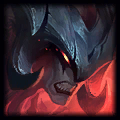

In [567]:
from IPython.display import Image, display
for i, img_url in enumerate(img_urls[:1]):
    print(f"Image: {img_names[i]},\nURL: {img_url}")
    try:
        img_response = requests.get(img_url, headers=headers, stream=True)
        if img_response.status_code == 200:
            display(Image(data=img_response.content))
    except:
        continue

In [541]:
img_data = requests.get(img_urls[0], headers=headers, stream=True).content
with open(f"{img_names[0]}", 'wb') as file:
    file.write(img_data)

### Export to Webp

In [507]:
!uv pip install Pillow

Resolved 1 package in 1.34s
Prepared 1 package in 856ms
Installed 1 package in 2.80s
 + pillow==11.3.0


In [542]:
from PIL import Image
from io import BytesIO

img_data = requests.get(img_urls[0], headers=headers, stream=True).content
image = Image.open(BytesIO(img_data))

output_filename = img_names[0].replace('.png','.webp')
image.save(output_filename, "WEBP", quality=100)

### Add image name column to the dataset

In [545]:
wide_df = df.copy()

In [546]:
wide_df['img'] = [img.replace('.png','.webp') for img in img_names]
wide_df.head(1)

ValueError: Length of values (168) does not match length of index (170)

In [548]:
wide_df.shape[0], len(img_names)

(170, 168)

In [558]:
wide_df[~wide_df['champion'].str.replace("'","%27").str.replace("Nunu & Willump","Nunu").str.replace(" ","_").isin([n.removesuffix('.png') for n in img_names])]

,champion,class,damage,toughness,control,mobility,utility,riot_dmg_type,difficulty
5,Ambessa,Burst,3,1,2,3,1,Magic,2
81,Mel,Burst,3,1,2,3,1,Magic,2


# If champ image doesn't exist on LoL fandom

https://mobalytics.gg/lol/champions

    <a href="/lol/champions/aatrox/build"><div style="background-color:rgba(56, 198, 244, 0.2);border:1px solid var(--general-blue-200)" class="m-12dr3gi"><div class="m-1dxseyi"><img src="https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg" alt="Fighter" loading="lazy" class="m-ku5kie"></div><div class="m-lt7hb0" role="img"><span><img src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04" alt="" loading="lazy" class="m-0"></span></div><div class="m-123baga">Aatrox</div><div class="m-am8tfa">the Darkin Blade</div><div class="m-s5xdrg"><div style="border-color:#fd7200" class="m-1tzbmhk"></div><p class="m-1nj5h5j">Hard</p></div><div class="m-1pr649u"><img src="https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg" alt="Top" loading="lazy" class="m-3ygx5n"></div></div></a>

In [594]:
url = "https://mobalytics.gg/lol/champions"

In [596]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
}

tmp_content = requests.get(
    url,
    headers=headers
).text

In [642]:
soup = BeautifulSoup(tmp_content, "html.parser")
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title data-rh="true">All 171 LoL Champions: Builds, Guides, Counters &amp; More</title><link crossorigin="" href="https://cdn.mobalytics.gg" rel="preconnect"/><link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#2b2b2d" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><link href="/favicon/favicon.ico" rel="shortcut icon"/><meta content="#2b2b2d" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#2b2b2d" name="theme-color"/><meta name="mobalytics-in-game-overlay-marker"/><meta content="HoFwbZB-YAfW6iNPS3VdM2b

In [639]:
# find the script tag with the JSON-LD
script_tag = soup.find("script", {"type": "application/ld+json"})
data = json.loads(script_tag.string)

data

{'@context': 'http://schema.org',
 'url': 'https://mobalytics.gg/lol/champions',
 'publisher': {'@type': 'Organization',
  'name': 'Mobalytics',
  'logo': {'@type': 'ImageObject',
   'url': 'https://cdnportal.mobalytics.gg/production/2020/11/dc342a6f-mobalytics-landing-logo-1.png',
   'width': 217,
   'height': 58}},
 '@type': 'ItemList',
 'itemListElement': [{'@type': 'ListItem',
   'position': 1,
   'url': 'https://mobalytics.gg/lol/champions/aatrox/build'},
  {'@type': 'ListItem',
   'position': 2,
   'url': 'https://mobalytics.gg/lol/champions/ahri/build'},
  {'@type': 'ListItem',
   'position': 3,
   'url': 'https://mobalytics.gg/lol/champions/akali/build'},
  {'@type': 'ListItem',
   'position': 4,
   'url': 'https://mobalytics.gg/lol/champions/akshan/build'},
  {'@type': 'ListItem',
   'position': 5,
   'url': 'https://mobalytics.gg/lol/champions/alistar/build'},
  {'@type': 'ListItem',
   'position': 6,
   'url': 'https://mobalytics.gg/lol/champions/ambessa/build'},
  {'@type':

In [640]:
# extract champion URLs
champion_urls = [item["url"] for item in data["itemListElement"]]

print(champion_urls[:5])

['https://mobalytics.gg/lol/champions/aatrox/build', 'https://mobalytics.gg/lol/champions/ahri/build', 'https://mobalytics.gg/lol/champions/akali/build', 'https://mobalytics.gg/lol/champions/akshan/build', 'https://mobalytics.gg/lol/champions/alistar/build']


In [645]:
img_tags = soup.find_all('a')

In [646]:
len(img_tags)

205

# Mobalitics Data

In [736]:
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',}

url = "https://mobalytics.gg/lol/champions"
response = requests.get(url, headers=headers)

In [737]:
soup = BeautifulSoup(response.text, "html.parser")
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title data-rh="true">All 171 LoL Champions: Builds, Guides, Counters &amp; More</title><link crossorigin="" href="https://cdn.mobalytics.gg" rel="preconnect"/><link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#2b2b2d" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><link href="/favicon/favicon.ico" rel="shortcut icon"/><meta content="#2b2b2d" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#2b2b2d" name="theme-color"/><meta name="mobalytics-in-game-overlay-marker"/><meta content="HoFwbZB-YAfW6iNPS3VdM2b

In [660]:
soup.find_all("a", href=True)

[<a class="x78zum5 xkuygi9 m-1gtwhu9" data-google-interstitial="false" href="/lol"><img alt="Mobalytics" class="m-1laa4zm" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/mobalytics-logo/logo-mobalytics-expanded-fixed.svg"/></a>,
 <a data-google-interstitial="false" href="https://mobalytics.gg/lol"><div class="xxzb6uj"><div class="x78zum5 x6s0dn4 x1nhvcw1 x14atkfc x5yr21d xdqdrvq x12oqio5 xf0wp53 x1m7wjq6"><img alt="League of Legends" class="x1kky2od xlup9mm x1db2dqx" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/ngf-games/lol-filled.svg?v1" style="filter:brightness(0) saturate(100%) invert(92%) sepia(58%) saturate(2719%) hue-rotate(318deg) brightness(94%) contrast(102%)"/><div class="x19jf9pv x1g1qkmr">LoL</div></div></div></a>,
 <a data-google-interstitial="false" href="https://mobalytics.gg/tft"><div class="xxzb6uj"><div class="x78zum5 x6s0dn4 x1nhvcw1 x14atkfc x5yr21d xdqdrvq x12oqio5 xfj9a5l"><img alt="Teamfight Tactics" class="x1kky2od xlup9m

    <a href="/lol/champions/aatrox/build"><div class="m-12dr3gi" style="background-color:rgba(56, 198, 244, 0.2);border:1px solid var(--general-blue-200)"><div class="m-1dxseyi"><img alt="Fighter" class="m-ku5kie" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg"/></div><div class="m-lt7hb0" role="img"><span><img alt="" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04"/></span></div><div class="m-123baga">Aatrox</div><div class="m-am8tfa">the Darkin Blade</div><div class="m-s5xdrg"><div class="m-1tzbmhk" style="border-color:#fd7200"></div><p class="m-1nj5h5j">Hard</p></div><div class="m-1pr649u"><img alt="Top" class="m-3ygx5n" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg"/></div></div></a>,

In [661]:
type(soup.find_all("a", href=True))

bs4.element.ResultSet

In [662]:
len(soup.find_all("a", href=True))

205

In [663]:
type(soup.find_all("a", href=True)[0])

bs4.element.Tag

In [674]:
count=0
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        count+=1
count

172

Currently there are 171 champions. So one is redudndant.

In [677]:
count=0
for a in soup.find_all("a", href=True):
    if count < 5:
        if a["href"].startswith("/lol/champions/"):
            print(a)
            print()
            count+=1

<a href="/lol/champions/yunara/build">last new champion</a>

<a href="/lol/champions/aatrox/build"><div class="m-12dr3gi" style="background-color:rgba(56, 198, 244, 0.2);border:1px solid var(--general-blue-200)"><div class="m-1dxseyi"><img alt="Fighter" class="m-ku5kie" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg"/></div><div class="m-lt7hb0" role="img"><span><img alt="" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04"/></span></div><div class="m-123baga">Aatrox</div><div class="m-am8tfa">the Darkin Blade</div><div class="m-s5xdrg"><div class="m-1tzbmhk" style="border-color:#fd7200"></div><p class="m-1nj5h5j">Hard</p></div><div class="m-1pr649u"><img alt="Top" class="m-3ygx5n" loading="lazy" src="https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg"/></div></div></a>

<a href="/lol/champions/ahri/build"><div class="m-12dr3gi"><div class="m-1dxseyi"><img a

The newly added champion seems a bit off:

    <a href="/lol/champions/yunara/build">last new champion</a>

In [774]:
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        print(a['href'])
        break

/lol/champions/yunara/build


In [683]:
champ_names=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        champ_names.append(a.find("div", class_="m-123baga"))

champ_names[:5]

[None,
 <div class="m-123baga">Aatrox</div>,
 <div class="m-123baga">Ahri</div>,
 <div class="m-123baga">Akali</div>,
 <div class="m-123baga">Akshan</div>]

In [687]:
champ_names=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.find("div", class_="m-123baga")
        if tag:
            champ_names.append(tag.get_text(strip=True))

champ_names[:5]

['Aatrox', 'Ahri', 'Akali', 'Akshan', 'Alistar']

In [689]:
champ_classes=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.select_one("div.m-1dxseyi img")
        if tag:
            champ_classes.append(tag.get("alt"))

champ_classes[:5]

['Fighter', 'Mage', 'Assassin', 'Marksman', 'Tank']

In [692]:
champ_img=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        tag=a.select_one("div.m-lt7hb0 img")
        if tag:
            champ_img.append(tag.get("src"))

champ_img[:5]

['https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/ahri.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/akali.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/akshan.png?v04',
 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/alistar.png?v04']

Image: Aatrox.png,
URL: https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04


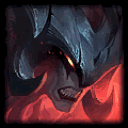

In [693]:
from IPython.display import Image, display

for i, img_url in enumerate(champ_img[:1]):
    print(f"Image: {img_names[i]},\nURL: {img_url}")
    try:
        img_response = requests.get(img_url, headers=headers, stream=True)
        if img_response.status_code == 200:
            display(Image(data=img_response.content))
    except:
        continue

### Combined Functions

In [805]:
len('<a href="/lol/champions/yunara/build">last new champion</a>')

59

In [816]:
champ_names=[]
champ_titles=[]
champ_classes=[]
champ_imgs=[]
champ_pages=[]

# The comparison is implemented due to some lists, like 'champ_pages', containing more values than expected
# See the '<a href="/lol/champions/yunara/build">last new champion</a>' element mentioned further above

for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        
        champ_title_tag = a.find("div", class_="m-am8tfa")
        if champ_title_tag:
            champ_titles.append(champ_title_tag.get_text(strip=True))
            
        champ_class_tag = a.select_one("div.m-1dxseyi img")
        if champ_class_tag and champ_title_tag:
            champ_classes.append(champ_class_tag.get("alt"))

        champ_name_tag = a.find("div", class_="m-123baga")
        if champ_name_tag and champ_class_tag:
            champ_names.append(champ_name_tag.get_text(strip=True))

        champ_img_tag = a.select_one("div.m-lt7hb0 img")
        if champ_img_tag and champ_name_tag:
            champ_imgs.append(champ_img_tag.get("src"))

        champ_page_tag = a['href']
        if champ_page_tag and champ_name_tag:
            champ_pages.append(champ_page_tag.strip())


In [817]:
len(champ_names), len(champ_titles), len(champ_classes), len(champ_imgs), len(champ_pages)

(171, 171, 171, 171, 171)

In [818]:
pd.Series(champ_pages).drop_duplicates().shape

(171,)

In [822]:
df = pd.DataFrame({
    'champ_name': pd.Series(champ_names),
    'champ_titles': pd.Series(champ_titles),
    'champ_classes': pd.Series(champ_classes),
    'champ_imgs': pd.Series(champ_imgs),
    'champ_pages': 'https://mobalytics.gg' + pd.Series(champ_pages)
    })

df

,champ_name,champ_titles,champ_classes,champ_imgs,champ_pages
0,Aatrox,the Darkin Blade,Fighter,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/aatrox/build
1,Ahri,the Nine-Tailed Fox,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/ahri/build
2,Akali,the Rogue Assassin,Assassin,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/akali/build
3,Akshan,the Rogue Sentinel,Marksman,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/akshan/build
4,Alistar,the Minotaur,Tank,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/alistar/build
5,Ambessa,Matriarch of War,Fighter,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/ambessa/build
6,Amumu,the Sad Mummy,Tank,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/amumu/build
7,Anivia,the Cryophoenix,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/anivia/build
8,Annie,the Dark Child,Mage,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/annie/build
9,Aphelios,the Weapon of the Faithful,Marksman,https://cdn.mobalytics.gg/assets/lol/images/dd...,https://mobalytics.gg/lol/champions/aphelios/b...


## Additional (higher update frequency) Data
- Weak Against
- Strong Against
- Good Synergy

This will be scraped for each champion

In [738]:
champ_pages=[]
for a in soup.find_all("a", href=True):
    if a["href"].startswith("/lol/champions/"):
        champ_pages.append(a['href'])

champ_pages[:5]

['/lol/champions/yunara/build',
 '/lol/champions/aatrox/build',
 '/lol/champions/ahri/build',
 '/lol/champions/akali/build',
 '/lol/champions/akshan/build']

In [739]:
sample_page_url = 'https://mobalytics.gg' + champ_pages[0]
sample_page_url

'https://mobalytics.gg/lol/champions/yunara/build'

In [740]:
sample_response = requests.get(sample_page_url, headers=headers)
sample_page = BeautifulSoup(sample_response.text, "html.parser")
sample_page

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width,initial-scale=1,shrink-to-fit=no" name="viewport"/><title data-rh="true">Yunara  Build Guide - Runes, Items &amp; More - Patch 25.17</title><link crossorigin="" href="https://cdn.mobalytics.gg" rel="preconnect"/><link href="/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link href="/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon/site.webmanifest" rel="manifest"/><link color="#2b2b2d" href="/favicon/safari-pinned-tab.svg" rel="mask-icon"/><link href="/favicon/favicon.ico" rel="shortcut icon"/><meta content="#2b2b2d" name="msapplication-TileColor"/><meta content="/favicon/browserconfig.xml" name="msapplication-config"/><meta content="#2b2b2d" name="theme-color"/><meta name="mobalytics-in-game-overlay-marker"/><meta content="HoFwbZB-YAfW6iNPS3VdM2

In [741]:
len(sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"))

4

In [742]:
sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6")

[<div class="m-18t0flh e1n6zbyc6"><header class="m-14ciwo6 e1n6zbyc2"><h3>Weak Against</h3><a class="m-e0shrk" href="/lol/champions/yunara/counters"><img alt="details icon" class="m-2qjoqf" src="https://cdn.mobalytics.gg/assets/common/icons/system-icons/right-line-arrow.svg"/></a></header><div class="m-19azwe2 ez6mgdl0"><a class="m-vluebp" href="/lol/champions/nilah/build"><div class="m-rhyfhj"><div class="m-bjn8wh"><div class="m-1w4wsg9"><div class="m-w8foxr" role="img"><span><img alt="Nilah" class="m-0" loading="lazy" src="https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/nilah.png?v04"/></span></div></div><svg class="m-18rolbm" style="color:var(--general-red-100)" viewbox="0 0 90 90"><g transform="translate(45,45)"><path d="M3.552713678800501e-15,-43.98863489584554A1,1,0,0,1,1.0227272727272763,-44.98837659802385A45,45,0,0,1,35.81098732796291,27.250196083633593A1,1,0,0,1,34.391697754164184,27.426467610434607L34.391697754164184,27.426467610434607A1,1,0,0,1,34.219387891164

In [758]:
for section in sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"):
    header = section.find("h3")
    if 'Weak' in header.get_text(strip=True):
        print(header)
    elif 'Strong' in header.get_text(strip=True):
        print(header)
    elif 'Synergy' in header.get_text(strip=True):
        print(header)
    

<h3>Weak Against</h3>
<h3>Strong Against</h3>
<h3>Best Synergy (DUO)</h3>


In [759]:
weak_against=[]
for a in sample_page.select("a.m-vluebp"):
    name_tag = a.find("p", class_="m-v1s0fv")
    winrate_tag = a.find("p", class_="m-1wtyuy0")

    if name_tag and winrate_tag:
        weak_against.append({
            "name": name_tag.get_text(strip=True),
            "winrate": winrate_tag.get_text(strip=True)
        })
        
weak_against

[{'name': 'Nilah', 'winrate': '35.7%'},
 {'name': 'Twitch', 'winrate': '40.0%'},
 {'name': 'Draven', 'winrate': '40.5%'},
 {'name': 'Miss Fortune', 'winrate': '42.0%'},
 {'name': "Kog'Maw", 'winrate': '44.2%'},
 {'name': 'Zeri', 'winrate': '47.1%'}]

In [768]:
# Combine both of the above loops

weak_against=[]
strong_against=[]
synergy_with=[]

for section in sample_page.find_all("div", class_="m-18t0flh e1n6zbyc6"):
    header = section.find("h3")
    
    if 'Weak' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                weak_against.append({
                    "relationship": "countered",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })
                
    elif 'Strong' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                strong_against.append({
                    "relationship": "counters",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })

    elif 'Synergy' in header.get_text(strip=True):
        
        for a in sample_page.select("a.m-vluebp"):
            name_tag = a.find("p", class_="m-v1s0fv")
            winrate_tag = a.find("p", class_="m-1wtyuy0")
        
            if name_tag and winrate_tag:
                synergy_with.append({
                    "relationship": "synergy",
                    "name": name_tag.get_text(strip=True),
                    "winrate": winrate_tag.get_text(strip=True)
                })


In [769]:
print(weak_against)

[{'relationship': 'countered', 'name': 'Nilah', 'winrate': '35.7%'}, {'relationship': 'countered', 'name': 'Twitch', 'winrate': '40.0%'}, {'relationship': 'countered', 'name': 'Draven', 'winrate': '40.5%'}, {'relationship': 'countered', 'name': 'Miss Fortune', 'winrate': '42.0%'}, {'relationship': 'countered', 'name': "Kog'Maw", 'winrate': '44.2%'}, {'relationship': 'countered', 'name': 'Zeri', 'winrate': '47.1%'}]


In [773]:
pd.concat([
    pd.DataFrame(weak_against),
    pd.DataFrame(strong_against),
    pd.DataFrame(synergy_with)
])

,relationship,name,winrate
0,countered,Nilah,35.7%
1,countered,Twitch,40.0%
2,countered,Draven,40.5%
3,countered,Miss Fortune,42.0%
4,countered,Kog'Maw,44.2%
5,countered,Zeri,47.1%
0,counters,Nilah,35.7%
1,counters,Twitch,40.0%
2,counters,Draven,40.5%
3,counters,Miss Fortune,42.0%


In [745]:
sections_data = {}

for section in soup.select("div.m-18t0flh.e1n6zbyc6"):
    # section title (e.g. "Weak Against", "Strong Against", "Best Synergy (DUO)")
    header = section.find("h3")
    if not header:
        continue
    title = header.get_text(strip=True)

    champs = []
    for a in section.select("a.m-vluebp"):
        champ_name = a.find("p", class_="m-v1s0fv")
        winrate = a.find("p", class_="m-1wtyuy0") or a.find("p", class_="m-d1usi")  # diff class names
        img_tag = a.find("img", class_="m-0")
        
        champs.append({
            "name": champ_name.get_text(strip=True) if champ_name else None,
            "url": a["href"],
            "winrate": winrate.get_text(strip=True) if winrate else None,
            "icon": img_tag["src"] if img_tag else None,
        })
    
    sections_data[title] = champs

sections_data

{}

# Final Function Prototypes 

In [885]:
# from bs4 import BeautifulSoup
# import requests

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',}

url = "https://mobalytics.gg/lol/champions"
res = requests.get(url, headers=headers)
soup = BeautifulSoup(res.text, "html.parser")

champions = []

for a in soup.find_all("a", href=True):
    href = a["href"]
    if not href.startswith("/lol/champions/"):
        continue

    champ = {
        "name": None,
        "title": None,
        "url": "https://mobalytics.gg" + href,
        "champion_img": None,
        "class_name": None,
        "class_img": None,
        "difficulty": None,
        "difficulty_color": None,
        "primary_role": None,
        "role_img": None
    }

    # Name
    name_tag = a.find("div", class_="m-123baga")
    if name_tag:
        champ["name"] = name_tag.get_text(strip=True)

    # Title
    title_tag = a.find("div", class_="m-am8tfa")
    if title_tag:
        champ["title"] = title_tag.get_text(strip=True)

    # Champion image
    champ_img_tag = a.select_one("div.m-lt7hb0 img")
    if champ_img_tag:
        champ["champion_img"] = champ_img_tag.get("src")

    # Class info
    class_img_tag = a.select_one("div.m-1dxseyi img")
    if class_img_tag:
        champ["class_name"] = class_img_tag.get("alt")
        champ["class_img"] = class_img_tag.get("src")

    # Difficulty
    diff_tag = a.find("p", class_="m-1nj5h5j")
    if diff_tag:
        champ["difficulty"] = diff_tag.get_text(strip=True)

     # Difficulty color
    diff_color_tag = a.select_one("div.m-s5xdrg div")
    if diff_color_tag and "style" in diff_color_tag.attrs:
        style = diff_color_tag["style"]
        if "border-color" in style:
            champ["difficulty_color"] = style.split("border-color:")[1].split(";")[0].strip()

    # Role
    role_tags = a.select("div.m-1pr649u img")
    for role_img in role_tags:
        champ["primary_role"] = role_img.get("alt"),
        champ["role_img"] = role_img.get("src")

    champions.append(champ)

In [886]:
# Preview
for c in champions[:3]:
    print(c)
    print()

{'name': None, 'title': None, 'url': 'https://mobalytics.gg/lol/champions/yunara/build', 'champion_img': None, 'class_name': None, 'class_img': None, 'difficulty': None, 'difficulty_color': None, 'primary_role': None, 'role_img': None}

{'name': 'Aatrox', 'title': 'the Darkin Blade', 'url': 'https://mobalytics.gg/lol/champions/aatrox/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/aatrox.png?v04', 'class_name': 'Fighter', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg', 'difficulty': 'Hard', 'difficulty_color': '#fd7200', 'primary_role': ('Top',), 'role_img': 'https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-top-bright.svg'}

{'name': 'Ahri', 'title': 'the Nine-Tailed Fox', 'url': 'https://mobalytics.gg/lol/champions/ahri/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/ahri.png?v04', 'class_name': 'Mage', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/i

In [887]:
for d in champions:
    if d['name'] == 'Yunara':
        print(d)

{'name': 'Yunara', 'title': 'The Unbroken Faith', 'url': 'https://mobalytics.gg/lol/champions/yunara/build', 'champion_img': 'https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/yunara.png?v04', 'class_name': 'Marksman', 'class_img': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/marksman.svg', 'difficulty': 'Average', 'difficulty_color': '#169ed3', 'primary_role': ('Bot',), 'role_img': 'https://cdn.mobalytics.gg/assets/common/icons/lol-roles/16-bot-bright.svg'}


In [888]:
len(champions)

172

In [1485]:
df = pd.DataFrame(champions).dropna().reset_index(drop=True)
df.head()

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,"(Top,)",https://cdn.mobalytics.gg/assets/common/icons/...
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Mid,)",https://cdn.mobalytics.gg/assets/common/icons/...
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,"(Mid,)",https://cdn.mobalytics.gg/assets/common/icons/...
3,Akshan,the Rogue Sentinel,https://mobalytics.gg/lol/champions/akshan/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Mid,)",https://cdn.mobalytics.gg/assets/common/icons/...
4,Alistar,the Minotaur,https://mobalytics.gg/lol/champions/alistar/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,"(Support,)",https://cdn.mobalytics.gg/assets/common/icons/...


In [1486]:
df.shape

(171, 10)

In [1487]:
df['primary_role'].value_counts()

primary_role
(Mid,)        40
(Top,)        38
(Jungle,)     36
(Support,)    35
(Bot,)        22
Name: count, dtype: int64

In [1488]:
'(Mid,)'.removeprefix('(').removesuffix(',)')

'Mid'

In [1489]:
df['primary_role'] = df['primary_role'].apply(lambda x: str(x).removeprefix('(').removesuffix(',)')).str.replace("'","")

In [1490]:
df.head(10)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
3,Akshan,the Rogue Sentinel,https://mobalytics.gg/lol/champions/akshan/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
4,Alistar,the Minotaur,https://mobalytics.gg/lol/champions/alistar/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Support,https://cdn.mobalytics.gg/assets/common/icons/...
5,Ambessa,Matriarch of War,https://mobalytics.gg/lol/champions/ambessa/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Top,https://cdn.mobalytics.gg/assets/common/icons/...
6,Amumu,the Sad Mummy,https://mobalytics.gg/lol/champions/amumu/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Tank,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Support,https://cdn.mobalytics.gg/assets/common/icons/...
7,Anivia,the Cryophoenix,https://mobalytics.gg/lol/champions/anivia/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
8,Annie,the Dark Child,https://mobalytics.gg/lol/champions/annie/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Mid,https://cdn.mobalytics.gg/assets/common/icons/...
9,Aphelios,the Weapon of the Faithful,https://mobalytics.gg/lol/champions/aphelios/b...,https://cdn.mobalytics.gg/assets/lol/images/dd...,Marksman,https://cdn.mobalytics.gg/assets/lol/images/ch...,Severe,#bf090d,Bot,https://cdn.mobalytics.gg/assets/common/icons/...


In [1491]:
df['class_name'].value_counts()

class_name
Fighter     47
Mage        37
Marksman    29
Tank        24
Assassin    17
Support     17
Name: count, dtype: int64

In [1492]:
df.isna().any()

name                False
title               False
url                 False
champion_img        False
class_name          False
class_img           False
difficulty          False
difficulty_color    False
primary_role        False
role_img            False
dtype: bool

In [1493]:
import pandas as pd
import asyncio
import httpx
import os
import aiofiles
from PIL import Image
from io import BytesIO

async def download_image(client: httpx.AsyncClient, img_link: str, file_path: str, quality: int = 100):
    """Downloads a single image asynchronously and saves it as WebP."""
    try:
        async with client.stream('GET', img_link, follow_redirects=True, timeout=30) as response:
            response.raise_for_status()
            # Collect all chunks into a single bytes object
            content = b''
            async for chunk in response.aiter_bytes():
                content += chunk
            
            # Convert to WebP using Pillow
            image = Image.open(BytesIO(content))
            
            # Ensure the file path has .webp extension
            if not file_path.lower().endswith('.webp'):
                file_path = os.path.splitext(file_path)[0] + '.webp'
            
            # Save as temporary file first
            temp_file = file_path + '.temp'
            image.save(temp_file, "WEBP", quality=quality)
            
            # Move to final destination (atomic operation)
            async with aiofiles.open(file_path, 'wb') as f:
                async with aiofiles.open(temp_file, 'rb') as temp:
                    await f.write(await temp.read())
            
            # Clean up temporary file
            try:
                os.remove(temp_file)
            except:
                pass
                
        print(f"Downloaded and converted to WebP: {os.path.basename(file_path)}")
        return True
    except httpx.HTTPError as e:
        print(f"Failed to download {img_link}: HTTP error - {e}")
    except Exception as e:
        print(f"Failed to process {img_link}: An error occurred - {e}")
    return False

async def main(df: pd.DataFrame, url_column: str, filename_column: str, output_folder: str = "downloaded_images", quality: int = 100):
    """
    Manages the concurrent download of images based on a DataFrame and saves them as WebP.
    
    Args:
        df (pd.DataFrame): DataFrame with columns for image URLs and filenames.
        url_column (str): Name of the column containing image URLs.
        filename_column (str): Name of the column containing desired filenames.
        output_folder (str): The directory to save the downloaded images.
        quality (int): The quality of the WebP image (0-100, higher is better).
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    async with httpx.AsyncClient() as client:
        tasks = [
            download_image(client, row[url_column], os.path.join(output_folder, row[filename_column]), quality)
            for _, row in df.iterrows()
        ]
        await asyncio.gather(*tasks)

In [1494]:
df['champion_img_file'] = df['champion_img'].str.replace('.png?v04', '.webp').str.removeprefix('https://cdn.mobalytics.gg/assets/lol/images/dd/champions/icons/')
df['champion_img_path'] = df['champion_img_file'].apply(lambda x: 'assets/champions/' + x) 
df.sample(5)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
117,Sett,the Boss,https://mobalytics.gg/lol/champions/sett/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Top,https://cdn.mobalytics.gg/assets/common/icons/...,sett.webp,assets/champions/sett.webp
51,Jax,Grandmaster at Arms,https://mobalytics.gg/lol/champions/jax/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Jungle,https://cdn.mobalytics.gg/assets/common/icons/...,jax.webp,assets/champions/jax.webp
140,Twisted Fate,the Card Master,https://mobalytics.gg/lol/champions/twistedfat...,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,twistedfate.webp,assets/champions/twistedfate.webp
57,Karma,the Enlightened One,https://mobalytics.gg/lol/champions/karma/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Easy,#b2b2b0,Support,https://cdn.mobalytics.gg/assets/common/icons/...,karma.webp,assets/champions/karma.webp
31,Evelynn,Agony's Embrace,https://mobalytics.gg/lol/champions/evelynn/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Jungle,https://cdn.mobalytics.gg/assets/common/icons/...,evelynn.webp,assets/champions/evelynn.webp


In [1206]:
await main(df, url_column='champion_img', filename_column='champion_img_file', output_folder='champions')

Downloaded and converted to WebP: aphelios.webp
Downloaded and converted to WebP: anivia.webp
Downloaded and converted to WebP: bard.webp
Downloaded and converted to WebP: alistar.webp
Downloaded and converted to WebP: ambessa.webp
Downloaded and converted to WebP: belveth.webp
Downloaded and converted to WebP: azir.webp
Downloaded and converted to WebP: aatrox.webp
Downloaded and converted to WebP: aurelionsol.webp
Downloaded and converted to WebP: akshan.webp
Downloaded and converted to WebP: akali.webp
Downloaded and converted to WebP: annie.webp
Downloaded and converted to WebP: ahri.webp
Downloaded and converted to WebP: aurora.webp
Downloaded and converted to WebP: amumu.webp
Downloaded and converted to WebP: camille.webp
Downloaded and converted to WebP: briar.webp
Downloaded and converted to WebP: braum.webp
Downloaded and converted to WebP: cassiopeia.webp
Downloaded and converted to WebP: darius.webp
Downloaded and converted to WebP: blitzcrank.webp
Downloaded and converted t

# JSON data prep

## Nodes

In [1497]:
NODES = pd.concat([
    pd.DataFrame({
        'label':['League of Legends'],
        'type':['brand'],
    }),
    pd.DataFrame({
        'label': df['name'].unique(),
        'type': 'champion'
    }),
    pd.DataFrame({
        'label': df['class_name'].unique(),
        'type': 'class'
    }),
    pd.DataFrame({
        'label': df['difficulty'].unique(),
        'type': 'difficulty'
    })
],ignore_index=True)

In [1501]:
NODES = NODES.reset_index(names='id')
NODES

,id,label,type
0,0,League of Legends,brand
1,1,Aatrox,champion
2,2,Ahri,champion
3,3,Akali,champion
4,4,Akshan,champion
5,5,Alistar,champion
6,6,Ambessa,champion
7,7,Amumu,champion
8,8,Anivia,champion
9,9,Annie,champion


In [1502]:
df.head(1)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...,aatrox.webp,assets/champions/aatrox.webp


### Main LoL node

In [1514]:
nodes0 = pd.DataFrame({
    'id': NODES.loc[0,'id'],
    'label': NODES.loc[0,'label'],
    'type': NODES.loc[0,'type'],
    'image': ['assets/other/lol.png'],
    'size': 40,
    'mass': 50
})
nodes0

,id,label,type,image,size,mass
0,0,League of Legends,brand,assets/other/lol.png,40,50


### Champions

In [1530]:
nodes1 = pd.merge(
    NODES,
    df.loc[:, ['name','champion_img_path']],
    how='left',
    left_on='label',
    right_on='name'
).drop_duplicates().drop(columns='name').dropna().rename(columns={'champion_img_path':'image'}).reset_index(drop=True)



# nodes3 = pd.merge(
#     nodes,
#     df.loc[:, ['primary_role','role_img']],
#     how='left',
#     left_on='label',
#     right_on='primary_role'

In [1531]:
nodes1.head()

,id,label,type,image
0,1,Aatrox,champion,assets/champions/aatrox.webp
1,2,Ahri,champion,assets/champions/ahri.webp
2,3,Akali,champion,assets/champions/akali.webp
3,4,Akshan,champion,assets/champions/akshan.webp
4,5,Alistar,champion,assets/champions/alistar.webp


### Classes

In [1532]:
nodes2 = pd.merge(
    NODES,
    df.loc[:, ['class_name','class_img']],
    how='left',
    left_on='label',
    right_on='class_name'
).drop_duplicates().drop(columns='class_name').dropna().rename(columns={'class_img':'image'}).reset_index(drop=True)

In [1533]:
nodes2

,id,label,type,image
0,172,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
1,173,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
2,174,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
3,175,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
4,176,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...
5,177,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...


In [1534]:
class_df = df.groupby(['class_name'], as_index=False).agg(size=('name', 'count'))
class_df['size_norm'] = (class_df['size'].rank(method='dense')**1.5).astype('int')+20
class_df['mass'] = (class_df['size'].rank(method='dense')**1.5).astype('int')
class_df

,class_name,size,size_norm,mass
0,Assassin,17,21,1
1,Fighter,47,31,11
2,Mage,37,28,8
3,Marksman,29,25,5
4,Support,17,21,1
5,Tank,24,22,2


In [1535]:
nodes2 = pd.merge(
    nodes2,
    class_df[['class_name','size_norm','mass']],
    how='left',
    left_on='label',
    right_on='class_name',
)
nodes2

,id,label,type,image,class_name,size_norm,mass
0,172,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Fighter,31,11
1,173,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Mage,28,8
2,174,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Assassin,21,1
3,175,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Marksman,25,5
4,176,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Tank,22,2
5,177,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,Support,21,1


In [1536]:
nodes2 = nodes2.drop(columns=['class_name']).rename(columns={'size_norm':'size'})
nodes2

,id,label,type,image,size,mass
0,172,Fighter,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,31,11
1,173,Mage,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,28,8
2,174,Assassin,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,21,1
3,175,Marksman,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,25,5
4,176,Tank,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,22,2
5,177,Support,class,https://cdn.mobalytics.gg/assets/lol/images/ch...,21,1


### Convert nodes to json

In [1541]:
nodes = []

In [1542]:
for i in range(nodes0.shape[0]):
    node = {
        'id': int(nodes0.loc[i,'id']),
        'label': str(nodes0.loc[i,'label']),
        'type': str(nodes0.loc[i,'type']),
        'image': str(nodes0.loc[i,'image']),
        'size': int(nodes0.loc[i,'size']),
        'mass': int(nodes0.loc[i,'mass'])
    } 
    nodes.append(node)

In [1476]:
# nodes_df = (
#     nodes1
#     .sort_values(['type','label'], ascending=True)
#     .reset_index(drop=True)
#     .reset_index()
#     .rename(columns={'index':'id'})
# )

In [1543]:
for i in range(nodes1.shape[0]):
    node = {
        'id': int(nodes1.loc[i,'id']),
        'label': str(nodes1.loc[i,'label']),
        'type': str(nodes1.loc[i,'type']),
        'image': str(nodes1.loc[i,'image'])
    } 
    nodes.append(node)

In [1544]:
for i in range(nodes2.shape[0]):
    node = {
        'id': int(nodes2.loc[i,'id']),
        'label': str(nodes2.loc[i,'label']),
        'type': str(nodes2.loc[i,'type']),
        'image': str(nodes2.loc[i,'image']),
        'size': int(nodes2.loc[i,'size']),
        'mass': int(nodes2.loc[i,'mass'])
    } 
    nodes.append(node)

In [1545]:
nodes[-10:]

[{'id': 168,
  'label': 'Ziggs',
  'type': 'champion',
  'image': 'assets/champions/ziggs.webp'},
 {'id': 169,
  'label': 'Zilean',
  'type': 'champion',
  'image': 'assets/champions/zilean.webp'},
 {'id': 170,
  'label': 'Zoe',
  'type': 'champion',
  'image': 'assets/champions/zoe.webp'},
 {'id': 171,
  'label': 'Zyra',
  'type': 'champion',
  'image': 'assets/champions/zyra.webp'},
 {'id': 172,
  'label': 'Fighter',
  'type': 'class',
  'image': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/fighter.svg',
  'size': 31,
  'mass': 11},
 {'id': 173,
  'label': 'Mage',
  'type': 'class',
  'image': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/mage.svg',
  'size': 28,
  'mass': 8},
 {'id': 174,
  'label': 'Assassin',
  'type': 'class',
  'image': 'https://cdn.mobalytics.gg/assets/lol/images/champions-classes/assassin.svg',
  'size': 21,
  'mass': 1},
 {'id': 175,
  'label': 'Marksman',
  'type': 'class',
  'image': 'https://cdn.mobalytics.gg/assets/lol/i

## Edges

In [1452]:
df.head(3)

,name,title,url,champion_img,class_name,class_img,difficulty,difficulty_color,primary_role,role_img,champion_img_file,champion_img_path
0,Aatrox,the Darkin Blade,https://mobalytics.gg/lol/champions/aatrox/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Fighter,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Top,https://cdn.mobalytics.gg/assets/common/icons/...,aatrox.webp,assets/champions/aatrox.webp
1,Ahri,the Nine-Tailed Fox,https://mobalytics.gg/lol/champions/ahri/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Mage,https://cdn.mobalytics.gg/assets/lol/images/ch...,Average,#169ed3,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,ahri.webp,assets/champions/ahri.webp
2,Akali,the Rogue Assassin,https://mobalytics.gg/lol/champions/akali/build,https://cdn.mobalytics.gg/assets/lol/images/dd...,Assassin,https://cdn.mobalytics.gg/assets/lol/images/ch...,Hard,#fd7200,Mid,https://cdn.mobalytics.gg/assets/common/icons/...,akali.webp,assets/champions/akali.webp


In [1546]:
NODES.head()

,id,label,type
0,0,League of Legends,brand
1,1,Aatrox,champion
2,2,Ahri,champion
3,3,Akali,champion
4,4,Akshan,champion


In [1551]:
rel0=pd.DataFrame({
    'brand': [NODES['label'].iloc[0]]*df['class_name'].unique().shape[0],
    'class_name': df['class_name'].unique().tolist()
})
rel0.head()

,brand,class_name
0,League of Legends,Fighter
1,League of Legends,Mage
2,League of Legends,Assassin
3,League of Legends,Marksman
4,League of Legends,Tank


In [1552]:
rel_A = pd.merge(rel0, NODES, how='left', left_on='brand', right_on='label').rename(columns={'id':'from'})
rel_B = pd.merge(rel_A, NODES, how='left', left_on='class_name', right_on='label').rename(columns={'id':'to'})
rel0 = rel_B.loc[:,['from','to']]
rel0

,from,to
0,0,172
1,0,173
2,0,174
3,0,175
4,0,176
5,0,177


In [1553]:
rel1=df[['name','class_name']]
rel1.head()

,name,class_name
0,Aatrox,Fighter
1,Ahri,Mage
2,Akali,Assassin
3,Akshan,Marksman
4,Alistar,Tank


In [1554]:
rel_A = pd.merge(rel1, NODES, how='left', left_on='class_name', right_on='label').rename(columns={'id':'from'})
rel_B = pd.merge(rel_A, NODES, how='left', left_on='name', right_on='label').rename(columns={'id':'to'})
rel1 = rel_B.loc[:,['from','to']]
rel1.head()

,from,to
0,172,1
1,173,2
2,174,3
3,175,4
4,176,5


In [1555]:
# rel2=df[['name','primary_role']]
# rel2.head(3)

,name,primary_role
0,Aatrox,Top
1,Ahri,Mid
2,Akali,Mid


In [1556]:
# rel_A = pd.merge(rel2, NODES, how='left', left_on='primary_role', right_on='label').rename(columns={'id':'from'})
# rel_B = pd.merge(rel_A, NODES, how='left', left_on='name', right_on='label').rename(columns={'id':'to'})
# rel2 = rel_B.loc[:,['from','to']]
# rel2.head()

,from,to
0,NaN,1
1,NaN,2
2,NaN,3
3,NaN,4
4,177.0,5


In [1557]:
edges = []
for i in range(rel0.shape[0]):
    edge = {'from': int(rel0.loc[i,'from']), 'to': int(rel0.loc[i,'to'])}
    edges.append(edge)
    break

edges

[{'from': 0, 'to': 172}]

In [1558]:
edges = []

for i in range(rel0.shape[0]):
    edge = {'from': int(rel0.loc[i,'from']), 'to': int(rel0.loc[i,'to'])}
    edges.append(edge)

for i in range(rel1.shape[0]):
    edge = {'from': int(rel1.loc[i,'from']), 'to': int(rel1.loc[i,'to'])}
    edges.append(edge)

len(edges) == rel0.shape[0] + rel1.shape[0]

True

In [1559]:
edges

[{'from': 0, 'to': 172},
 {'from': 0, 'to': 173},
 {'from': 0, 'to': 174},
 {'from': 0, 'to': 175},
 {'from': 0, 'to': 176},
 {'from': 0, 'to': 177},
 {'from': 172, 'to': 1},
 {'from': 173, 'to': 2},
 {'from': 174, 'to': 3},
 {'from': 175, 'to': 4},
 {'from': 176, 'to': 5},
 {'from': 172, 'to': 6},
 {'from': 176, 'to': 7},
 {'from': 173, 'to': 8},
 {'from': 173, 'to': 9},
 {'from': 175, 'to': 10},
 {'from': 175, 'to': 11},
 {'from': 173, 'to': 12},
 {'from': 173, 'to': 13},
 {'from': 173, 'to': 14},
 {'from': 177, 'to': 15},
 {'from': 172, 'to': 16},
 {'from': 176, 'to': 17},
 {'from': 173, 'to': 18},
 {'from': 176, 'to': 19},
 {'from': 172, 'to': 20},
 {'from': 175, 'to': 21},
 {'from': 172, 'to': 22},
 {'from': 173, 'to': 23},
 {'from': 176, 'to': 24},
 {'from': 175, 'to': 25},
 {'from': 172, 'to': 26},
 {'from': 172, 'to': 27},
 {'from': 175, 'to': 28},
 {'from': 176, 'to': 29},
 {'from': 174, 'to': 30},
 {'from': 174, 'to': 31},
 {'from': 174, 'to': 32},
 {'from': 175, 'to': 33},
 

### Export to Json

In [1095]:
import json

In [1560]:
data = {'nodes': nodes, 'edges': edges}

In [1561]:
data

{'nodes': [{'id': 0,
   'label': 'League of Legends',
   'type': 'brand',
   'image': 'assets/other/lol.png',
   'size': 40,
   'mass': 50},
  {'id': 1,
   'label': 'Aatrox',
   'type': 'champion',
   'image': 'assets/champions/aatrox.webp'},
  {'id': 2,
   'label': 'Ahri',
   'type': 'champion',
   'image': 'assets/champions/ahri.webp'},
  {'id': 3,
   'label': 'Akali',
   'type': 'champion',
   'image': 'assets/champions/akali.webp'},
  {'id': 4,
   'label': 'Akshan',
   'type': 'champion',
   'image': 'assets/champions/akshan.webp'},
  {'id': 5,
   'label': 'Alistar',
   'type': 'champion',
   'image': 'assets/champions/alistar.webp'},
  {'id': 6,
   'label': 'Ambessa',
   'type': 'champion',
   'image': 'assets/champions/ambessa.webp'},
  {'id': 7,
   'label': 'Amumu',
   'type': 'champion',
   'image': 'assets/champions/amumu.webp'},
  {'id': 8,
   'label': 'Anivia',
   'type': 'champion',
   'image': 'assets/champions/anivia.webp'},
  {'id': 9,
   'label': 'Annie',
   'type': 'ch

In [1562]:
file_path = "data.json"
with open(file_path, 'w') as json_file:
    json.dump(data, json_file, indent=4)